In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_excel(r'C:\Users\user\Desktop\Consomation Sonalgaz.xlsx')

In [3]:
df.head()

,Date,Region,Consomation Elec,Consomation gaz
0,2006-01-01,Ali Mendjli,27.250,177.72
1,2006-02-01,Ali Mendjli,27.180,252.19
2,2006-03-01,Ali Mendjli,26.034,81.41
3,2006-04-01,Ali Mendjli,25.950,72.49
4,2006-05-01,Ali Mendjli,25.450,112.47


In [4]:
df.shape

(432, 4)

In [5]:
df.describe()

,Date,Consomation Elec,Consomation gaz
count,432,432.000000,432.000000
mean,2014-12-16 04:26:40,30.311018,163.684354
min,2006-01-01 00:00:00,12.330374,17.010000
25%,2010-06-23 12:00:00,24.331870,61.500098
50%,2014-12-16 12:00:00,28.390928,122.996118
75%,2019-06-08 12:00:00,34.135045,237.234947
max,2023-12-01 00:00:00,65.726203,530.830705
std,NaN,8.724875,123.207951


In [6]:
df.Region.value_counts()

Region
Ali Mendjli     216
Constantine     216
Name: count, dtype: int64

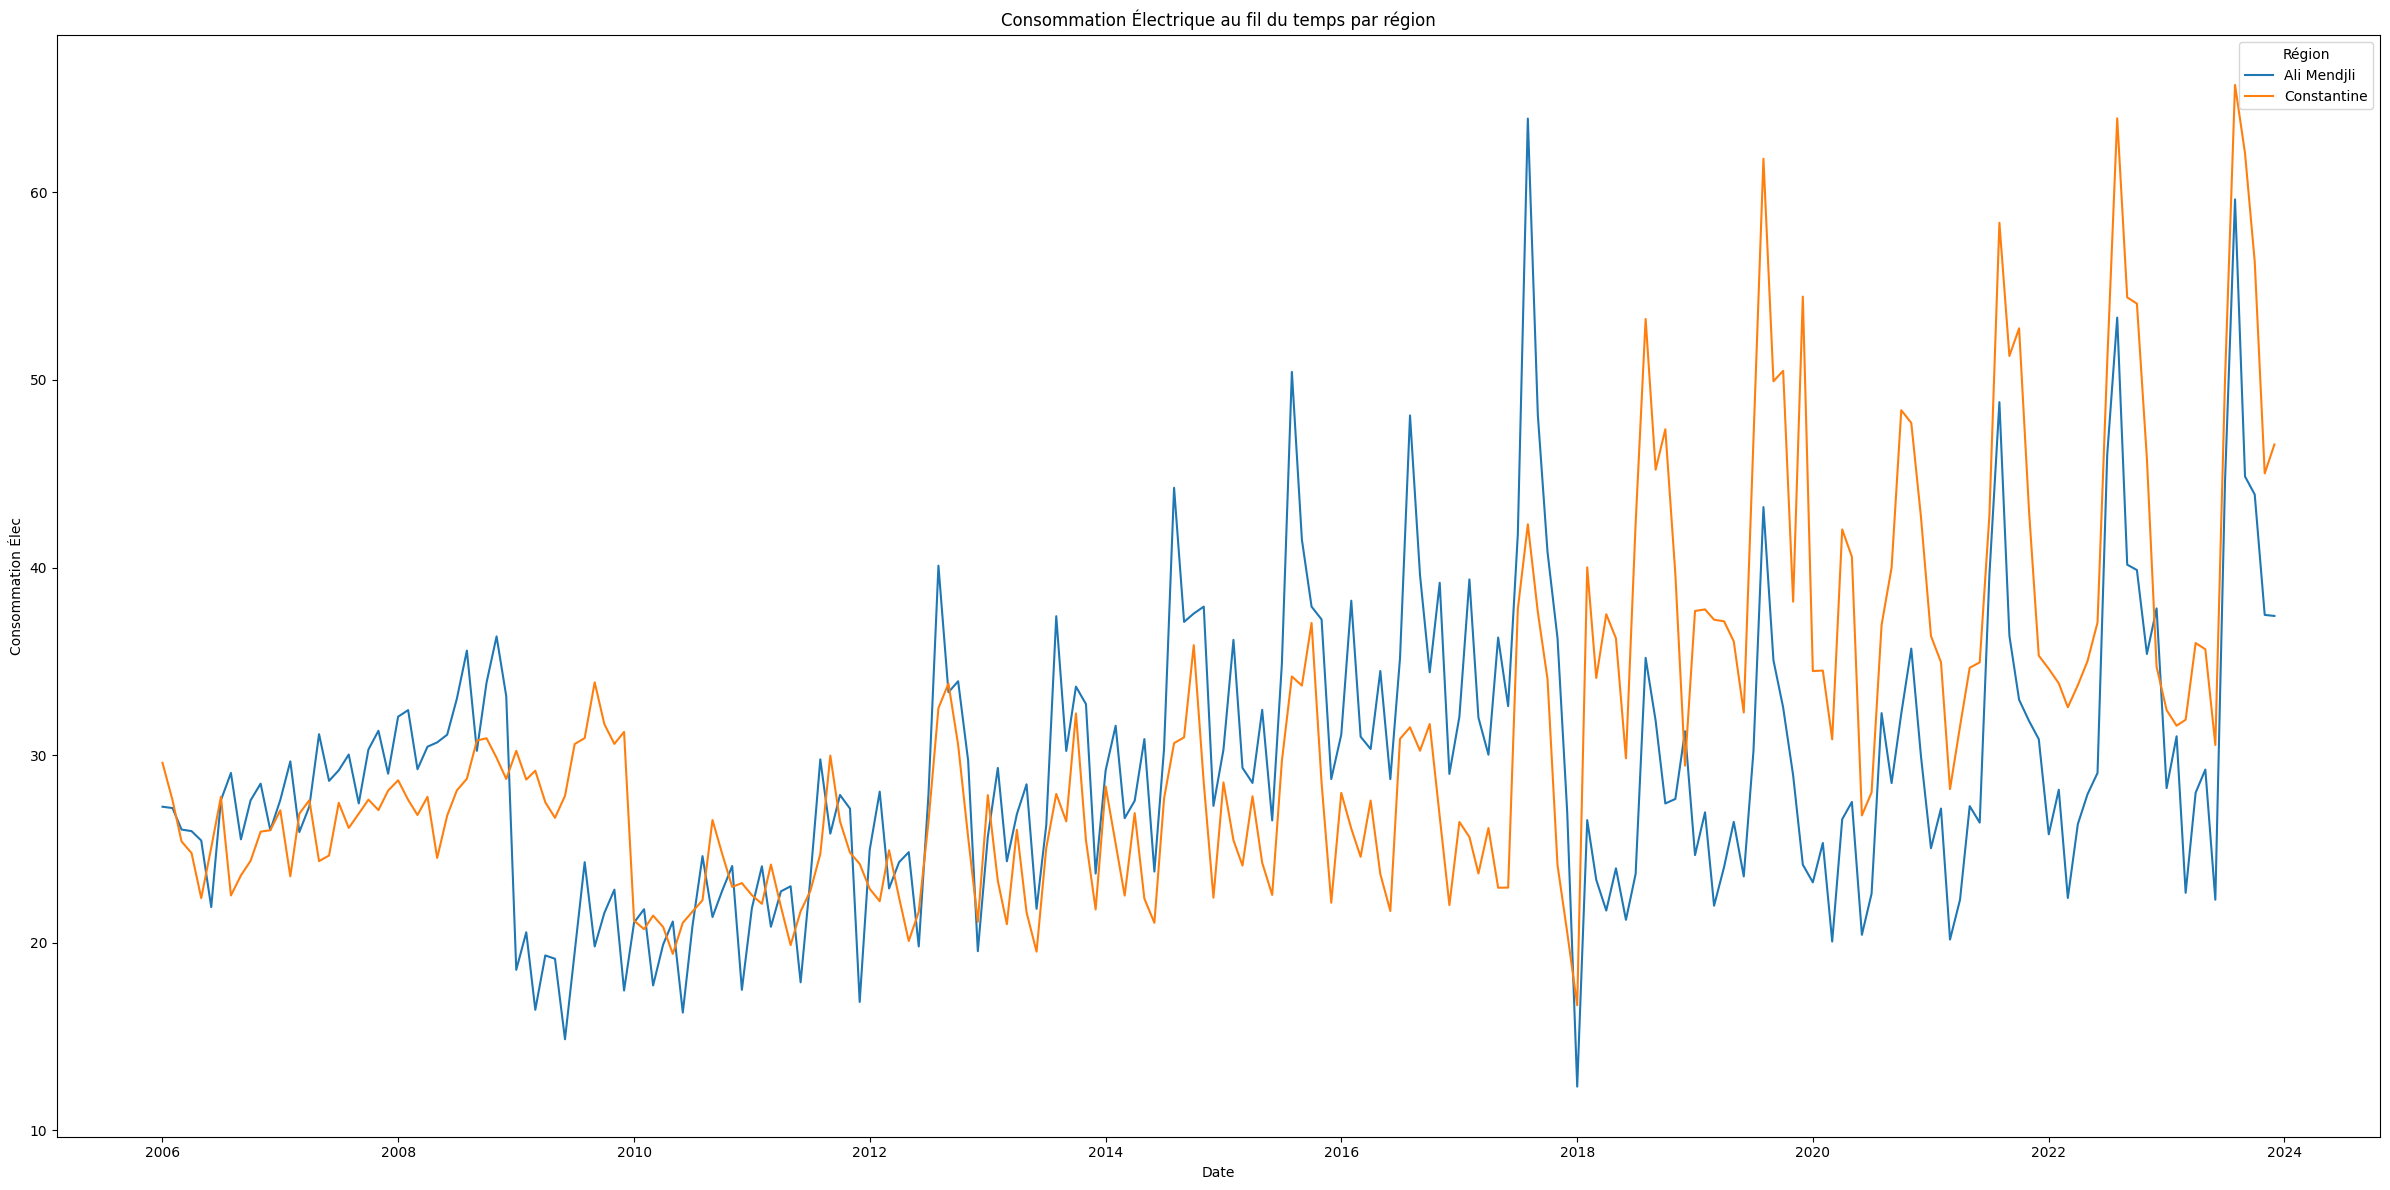

In [4]:

plt.figure(figsize=(24, 12))

sns.lineplot(data=df, x='Date', y='Consomation Elec', hue='Region')

plt.title("Consommation Électrique au fil du temps par région")
plt.xlabel("Date")
plt.ylabel("Consommation Élec")
plt.legend(title='Région')
plt.tight_layout()
plt.show()

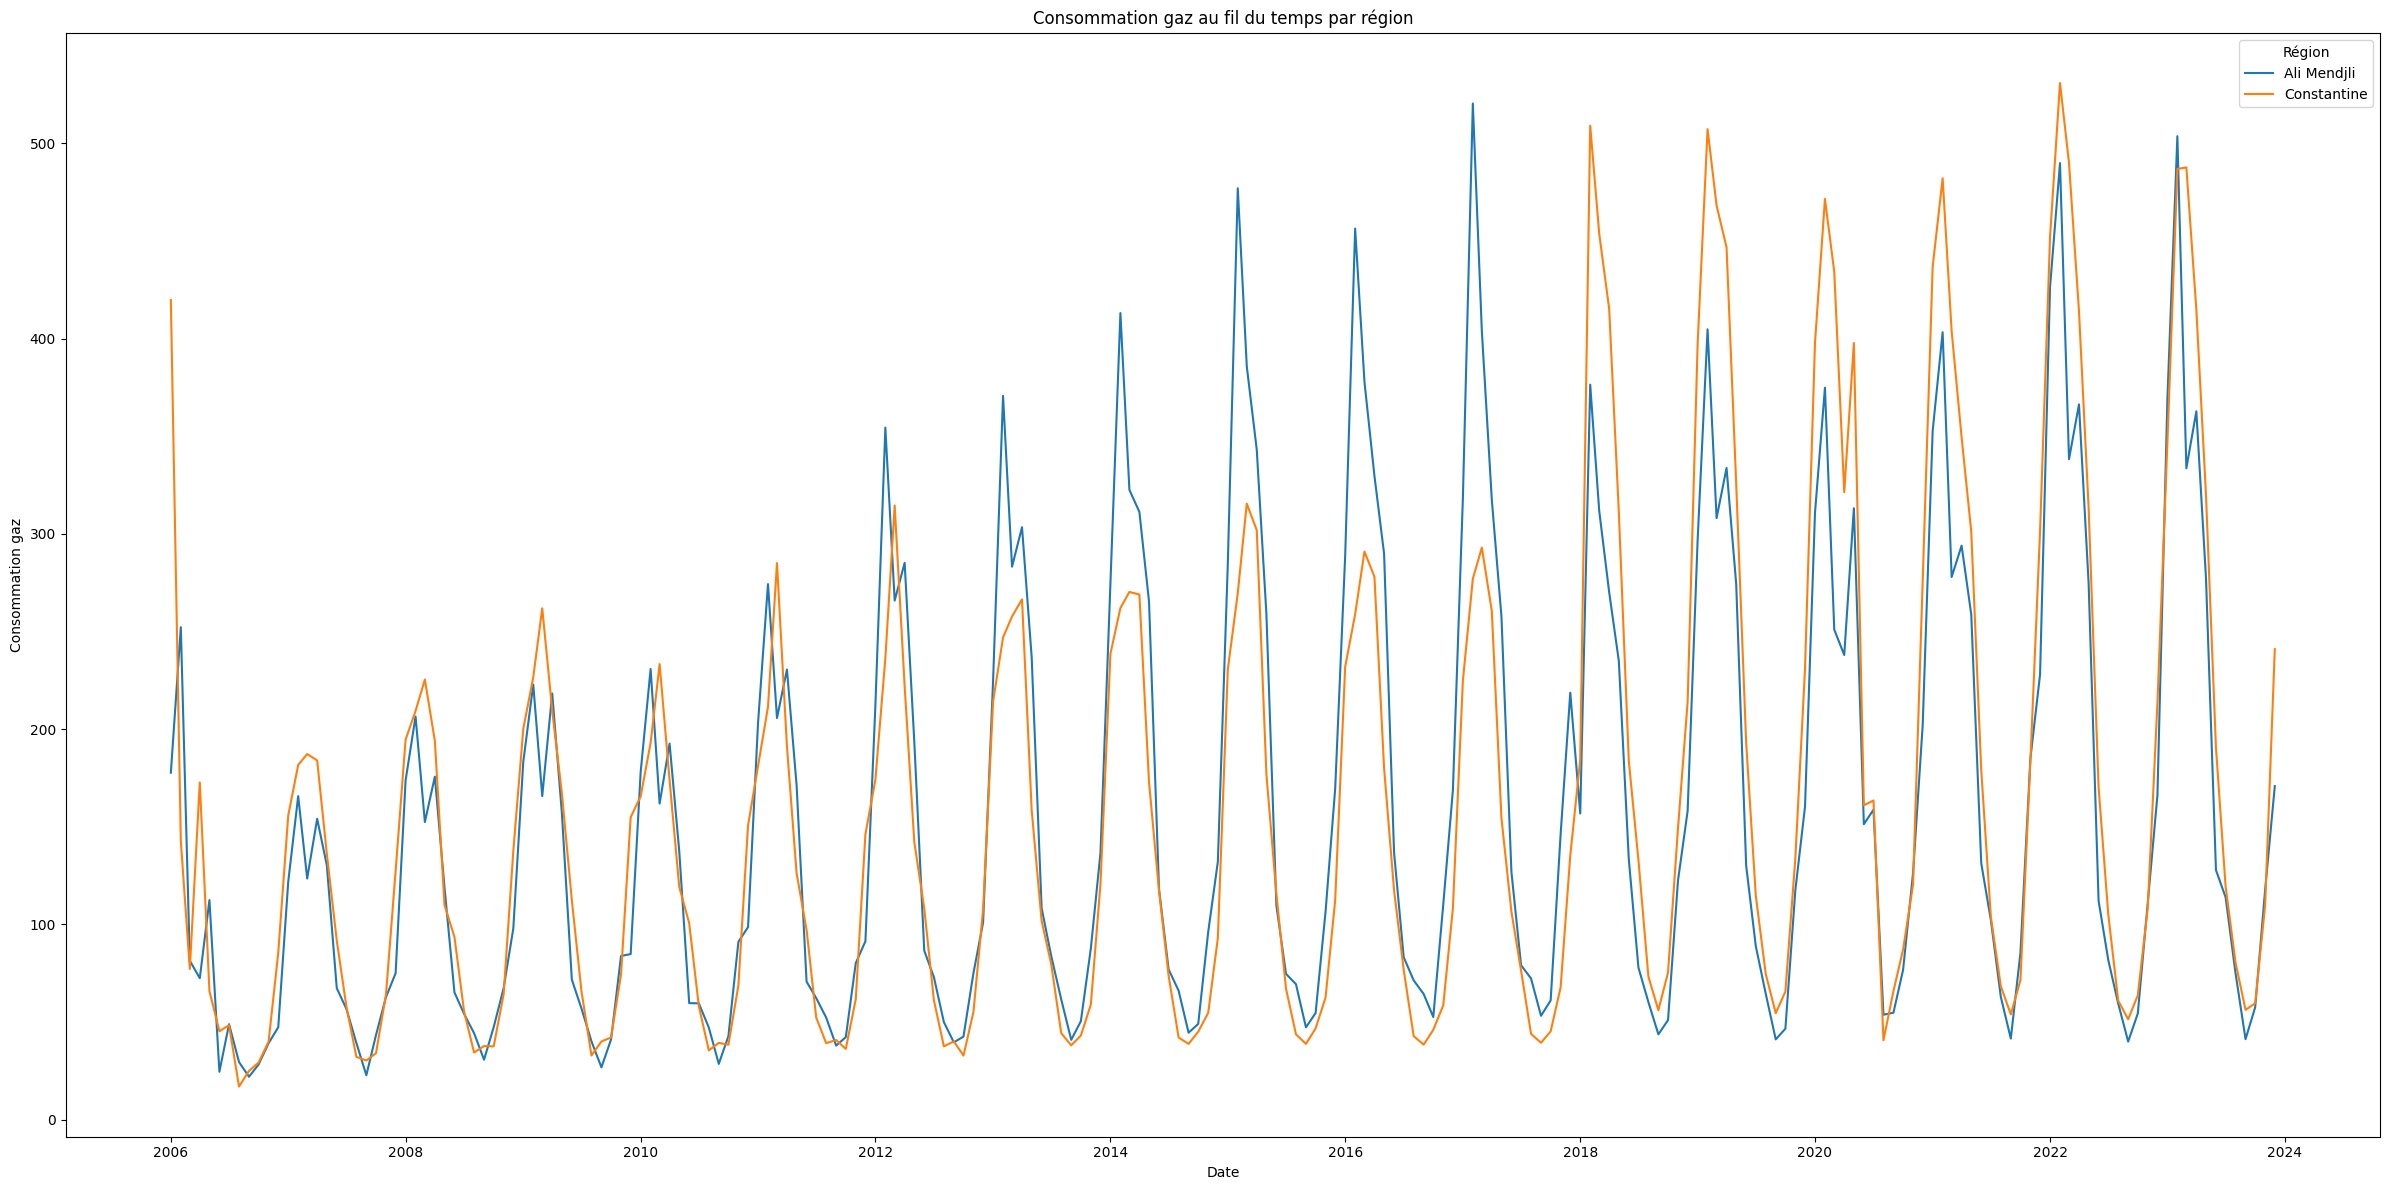

In [3]:
plt.figure(figsize=(24, 12))

sns.lineplot(data=df, x='Date', y='Consomation gaz', hue='Region')

plt.title("Consommation gaz au fil du temps par région")
plt.xlabel("Date")
plt.ylabel("Consommation gaz")
plt.legend(title='Région')
plt.tight_layout()
plt.show()

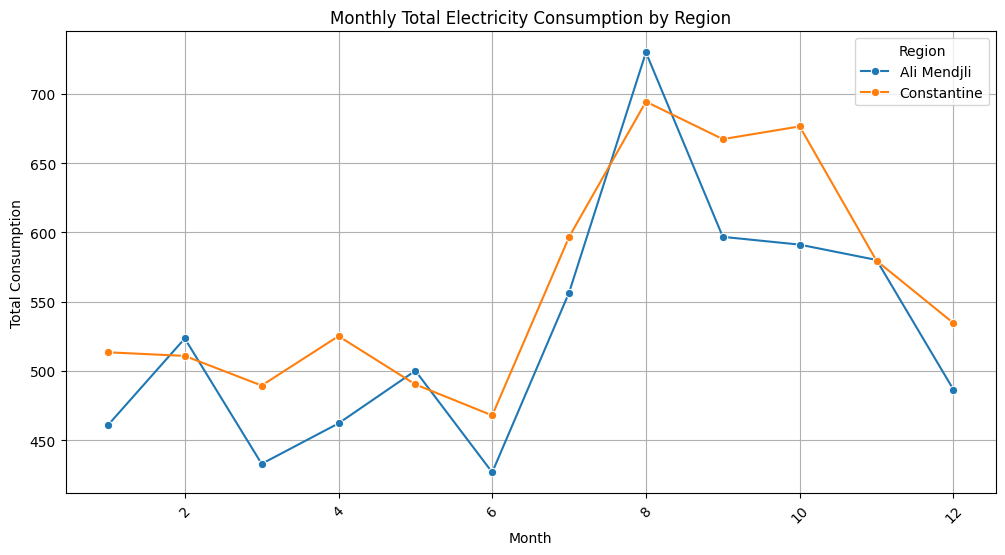

In [30]:
monthly_region_sum = df.groupby(['month', 'Region'])['Consomation Elec'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_region_sum, x='month', y='Consomation Elec', hue='Region', marker='o')
plt.title("Monthly Total Electricity Consumption by Region")
plt.xlabel("Month")
plt.ylabel("Total Consumption")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [60]:
monthly_region_sum = df.groupby(['month', 'Region'])['Consomation gaz'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_region_sum, x='month', y='Consomation gaz', hue='Region', marker='o')
plt.title("Monthly Total gaz Consumption by Region")
plt.xlabel("Month")
plt.ylabel("Total Consumption")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

KeyError: 'Column not found: Consomation gaz'

In [5]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month

In [6]:
df.head()

,Date,Region,Consomation Elec,Consomation gaz,year,month
0,2006-01-01,Ali Mendjli,27.250,177.72,2006,1
1,2006-02-01,Ali Mendjli,27.180,252.19,2006,2
2,2006-03-01,Ali Mendjli,26.034,81.41,2006,3
3,2006-04-01,Ali Mendjli,25.950,72.49,2006,4
4,2006-05-01,Ali Mendjli,25.450,112.47,2006,5


In [36]:
np.corrcoef(df['Consomation Elec'],df['year'])

array([[1.        , 0.48143382],
       [0.48143382, 1.        ]])

In [7]:
df = df.drop(columns =['Date','Consomation gaz'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Region            432 non-null    object 
 1   Consomation Elec  432 non-null    float64
 2   year              432 non-null    int32  
 3   month             432 non-null    int32  
dtypes: float64(1), int32(2), object(1)
memory usage: 10.3+ KB


In [9]:
df1 = pd.get_dummies(data=df, columns=['Region'])
df1.columns


Index(['Consomation Elec', 'year', 'month', 'Region_Ali Mendjli ',
       'Region_Constantine'],
      dtype='object')

In [10]:
df1.head()

,Consomation Elec,year,month,Region_Ali Mendjli,Region_Constantine
0,27.250,2006,1,True,False
1,27.180,2006,2,True,False
2,26.034,2006,3,True,False
3,25.950,2006,4,True,False
4,25.450,2006,5,True,False


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Consomation Elec     432 non-null    float64
 1   year                 432 non-null    int32  
 2   month                432 non-null    int32  
 3   Region_Ali Mendjli   432 non-null    bool   
 4   Region_Constantine   432 non-null    bool   
dtypes: bool(2), float64(1), int32(2)
memory usage: 7.7 KB


In [12]:
train_df= df1[(df1['year'] >= 2006) & (df1['year'] <= 2021)]
test_df = df1[(df1['year'] > 2021)]
            

In [13]:
train_df.head()

,Consomation Elec,year,month,Region_Ali Mendjli,Region_Constantine
0,27.250,2006,1,True,False
1,27.180,2006,2,True,False
2,26.034,2006,3,True,False
3,25.950,2006,4,True,False
4,25.450,2006,5,True,False


In [14]:
X_train = train_df.drop(columns= 'Consomation Elec')
X_test = test_df.drop(columns= 'Consomation Elec')
y_train = train_df['Consomation Elec']
y_test = test_df['Consomation Elec']

In [15]:
X_train.head()

,year,month,Region_Ali Mendjli,Region_Constantine
0,2006,1,True,False
1,2006,2,True,False
2,2006,3,True,False
3,2006,4,True,False
4,2006,5,True,False


In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
prediction = model.predict(X_test)

In [17]:
from sklearn.metrics import root_mean_squared_error,r2_score
rmse= root_mean_squared_error(y_test,prediction)
r2=r2_score(y_test,prediction)
print('rmse = ', rmse , 
       'r2=',r2)


rmse =  10.785131158544559 r2= 0.08677470814957411


In [18]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor()
model_rf.fit(X_train,y_train)
prediction_rf= model_rf.predict(X_test)

In [19]:
rmse_rf= root_mean_squared_error(y_test,prediction_rf)
r2_rf=r2_score(y_test,prediction_rf)
print('rmse_rf = ', rmse_rf , 
       'r2_rf=',r2_rf)

rmse_rf =  5.294710214407829 r2_rf= 0.7799043494736853


In [20]:
import lightgbm as lgb
lgbm=lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
lgbm.fit(X_train,y_train)
prediction_gbm=lgbm.predict(X_test)
rmse_gbm= root_mean_squared_error(y_test,prediction_gbm)
r2_gbm=r2_score(y_test,prediction_gbm)
print('rmse_rf = ', rmse_gbm , 
       'r2_rf=',r2_gbm)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000436 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 34
[LightGBM] [Info] Number of data points in the train set: 384, number of used features: 4
[LightGBM] [Info] Start training from score 29.214902
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

C:\Users\user\AppData\Local\Temp\ipykernel_14596\2121273150.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


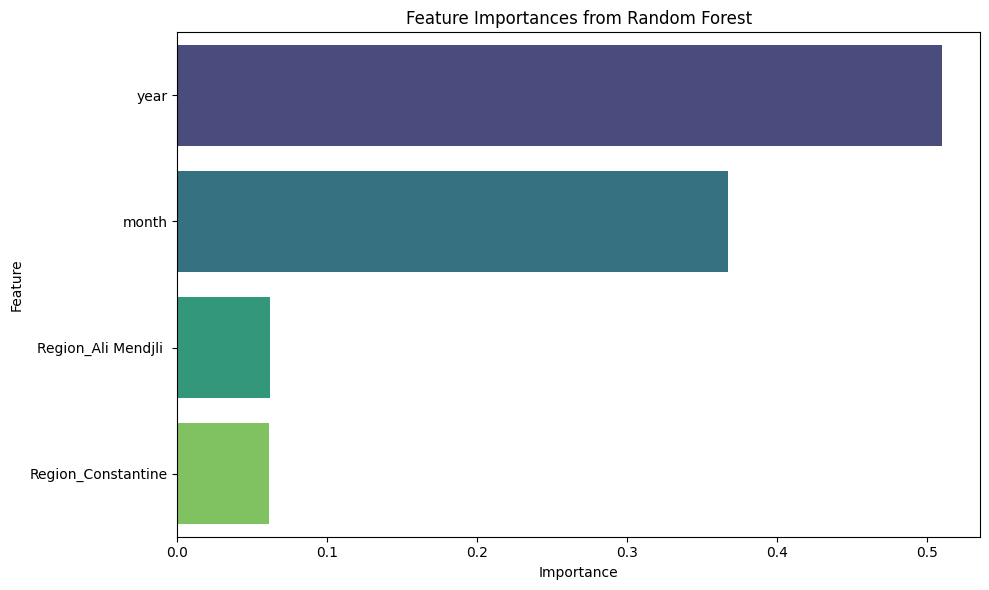

In [123]:
importances = model_rf.feature_importances_

# Match with feature names
feature_names = X_train.columns  # or use list if it's not a DataFrame
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importances from Random Forest")
plt.tight_layout()
plt.show()

In [21]:
df.head()

,Region,Consomation Elec,year,month
0,Ali Mendjli,27.250,2006,1
1,Ali Mendjli,27.180,2006,2
2,Ali Mendjli,26.034,2006,3
3,Ali Mendjli,25.950,2006,4
4,Ali Mendjli,25.450,2006,5


In [28]:
df_s = pd.read_excel(r'C:\Users\user\Desktop\Consomation Sonalgaz.xlsx')
df_s.head()

,Date,Region,Consomation Elec,Consomation gaz
0,2006-01-01,Ali Mendjli,27.250,177.72
1,2006-02-01,Ali Mendjli,27.180,252.19
2,2006-03-01,Ali Mendjli,26.034,81.41
3,2006-04-01,Ali Mendjli,25.950,72.49
4,2006-05-01,Ali Mendjli,25.450,112.47


In [31]:
train = df_s[df_s['Date'] <= '2021-01-01']
test = df_s[df_s['Date'] > '2021-01-01']

In [41]:
# serie temperal
from statsmodels.tsa.arima.model import ARIMA
regions = df_s['Region'].unique()
arima_results = {}
for region in regions:
    train_region = train[train['Region'] == region]['Consomation Elec']
    test_region = test[test['Region'] == region]['Consomation Elec']
    model = ARIMA(train_region, order=(1, 1, 1))
    results = model.fit()
    forecast = results.forecast(steps=len(test_region))
    rmse = root_mean_squared_error(test_region, forecast)
    r2 = r2_score(test_region, forecast)
    arima_results[region] = {'RMSE': rmse, 'R²': r2}
    print(f"ARIMA - {region}: RMSE: {rmse}, R²: {r2}")

ARIMA - Ali Mendjli : RMSE: 11.075578162068693, R²: -0.39054791142732936
ARIMA - Constantine: RMSE: 11.115143762522205, R²: -0.07503573364018457


C:\Users\user\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py

ADF Statistic: -2.0054667497749494
p-value: 0.2841812761731808
Data for Ali Mendjli  is non-stationary. Using d=1.


C:\Users\user\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-

ARIMA - Ali Mendjli : Order=(2, 1, 0), Seasonal=(0, 1, 1, 12), RMSE: 6.290536731712209, R²: 0.5514317302977929


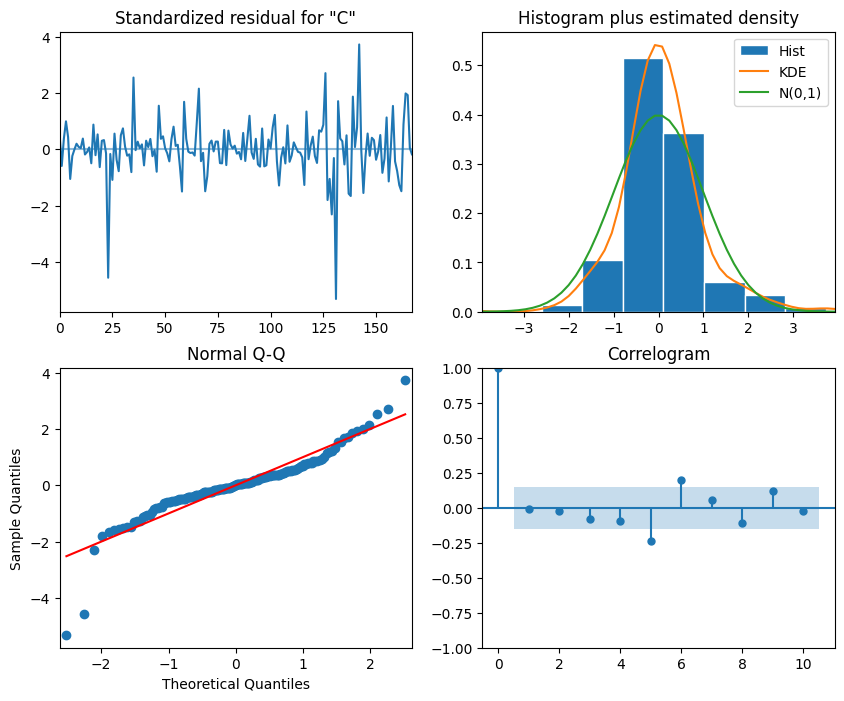

ADF Statistic: -0.710231521122837
p-value: 0.8440815133223613
Data for Constantine is non-stationary. Using d=1.


C:\Users\user\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py

ARIMA - Constantine: Order=(4, 1, 3), Seasonal=(1, 1, 1, 12), RMSE: 6.763273344930052, R²: 0.6019784264562864


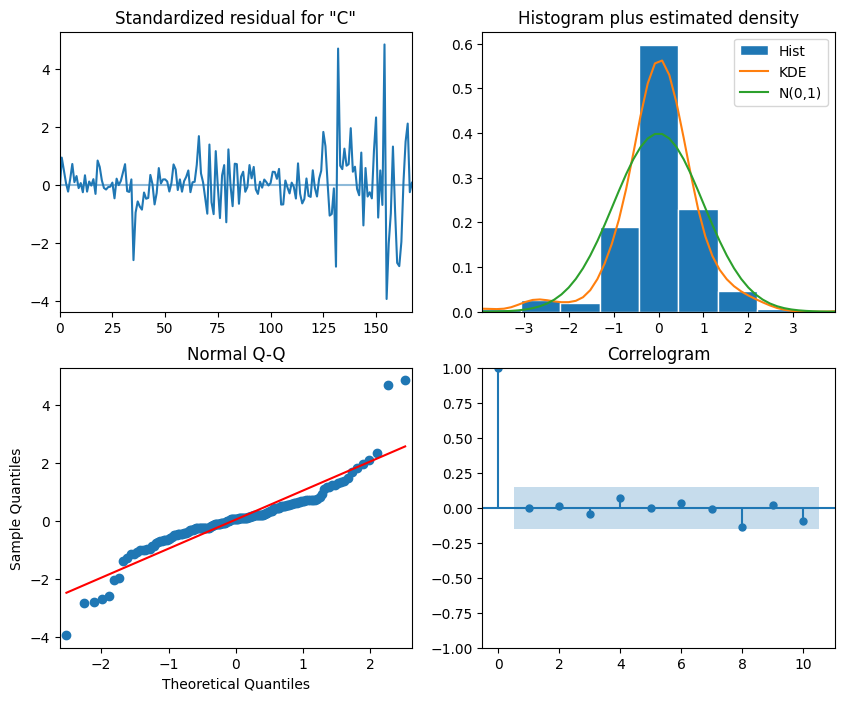

ARIMA - Average: RMSE: 6.5269050383211304, R²: 0.5767050783770397


In [ ]:



# Function to check stationarity
def check_stationarity(timeseries):
    result = adfuller(timeseries.dropna())
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    return result[1] < 0.05

# Improved ARIMA with extended order search
regions = df_s['Region'].unique()
arima_results = {}

for region in regions:
    # Filter data for the region
    train_region = train[train['Region'] == region]['Consomation Elec']
    test_region = test[test['Region'] == region]['Consomation Elec']
    
    if len(train_region) == 0 or len(test_region) == 0:
        print(f"Skipping {region} due to insufficient data.")
        continue
    
    # Check stationarity
    if not check_stationarity(train_region):
        print(f"Data for {region} is non-stationary. Using d=1.")
        d = 1
    else:
        print(f"Data for {region} is stationary. Using d=0.")
        d = 0
    
    # Test extended range of orders
    best_rmse = float('inf')
    best_order = (1, d, 1)
    best_seasonal_order = (0, 1, 0, 12)
    for p in range(0, 5):  # Expand to p=0, 1, 2, 3, 4
        for q in range(0, 5):  # Expand to q=0, 1, 2, 3, 4
            for P in range(0, 2):  # Test seasonal AR
                for Q in range(0, 2):  # Test seasonal MA
                    if p == 0 and q == 0:  # Skip invalid (0, d, 0)
                        continue
                    try:
                        model = ARIMA(train_region, order=(p, d, q), seasonal_order=(P, 1, Q, 12))
                        results = model.fit()
                        forecast = results.forecast(steps=len(test_region))
                        rmse = np.sqrt(mean_squared_error(test_region, forecast))
                        if rmse < best_rmse:
                            best_rmse = rmse
                            best_order = (p, d, q)
                            best_seasonal_order = (P, 1, Q, 12)
                    except:
                        continue
    
    # Fit with best orders
    model = ARIMA(train_region, order=best_order, seasonal_order=best_seasonal_order)
    results = model.fit()
    forecast = results.forecast(steps=len(test_region))
    
    # Evaluate
    rmse = np.sqrt(mean_squared_error(test_region, forecast))
    r2 = r2_score(test_region, forecast)
    arima_results[region] = {'RMSE': rmse, 'R²': r2}
    print(f"ARIMA - {region}: Order={best_order}, Seasonal={best_seasonal_order}, RMSE: {rmse}, R²: {r2}")
    
    # Diagnostic check
    results.plot_diagnostics(figsize=(10, 8))
    plt.show()

# Summary
avg_rmse = np.mean([arima_results[region]['RMSE'] for region in arima_results])
avg_r2 = np.mean([arima_results[region]['R²'] for region in arima_results])
print(f"ARIMA - Average: RMSE: {avg_rmse}, R²: {avg_r2}")

In [49]:
forecast_arima = results.forecast(steps=len(test_region))
forecast_arima

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


181    37.719079
182    36.743952
183    41.268546
184    38.187949
185    33.125141
186    42.811386
187    50.939223
188    47.060249
189    50.391009
190    42.564126
191    42.714941
192    38.157917
193    40.177259
194    37.781259
195    43.421793
196    40.934755
197    34.121885
198    43.143835
199    51.928076
200    48.173077
201    51.981576
202    45.446331
203    44.696372
204    39.750736
205    42.164527
206    39.749518
207    44.999974
208    42.796665
209    36.146308
210    44.954878
211    53.895925
212    50.204636
213    53.713645
214    47.162658
215    46.633509
Name: predicted_mean, dtype: float64

In [50]:
dates = test_region.index
real_values = test_region.values

In [51]:
real_values

array([34.956866, 28.190151, 31.532151, 34.657561, 34.944981, 42.767977,
       58.379118, 51.277566, 52.751391, 42.957921, 35.303668, 34.600395,
       33.827232, 32.552131, 33.727282, 35.014321, 37.072063, 50.91616 ,
       63.94373 , 54.400488, 54.069429, 45.800723, 34.709764, 32.402514,
       31.569994, 31.887245, 35.975745, 35.644479, 30.542027, 50.014106,
       65.726203, 62.078043, 56.314375, 45.016583, 46.5604  ])

In [56]:
min_length = min(len(dates), len(real_values), len(forecast_arima), len(prediction_rf))
dates = dates[:min_length]
real_values = real_values[:min_length]
forecast_arima = forecast_arima[:min_length]
predictions_rf = prediction_rf[:min_length]

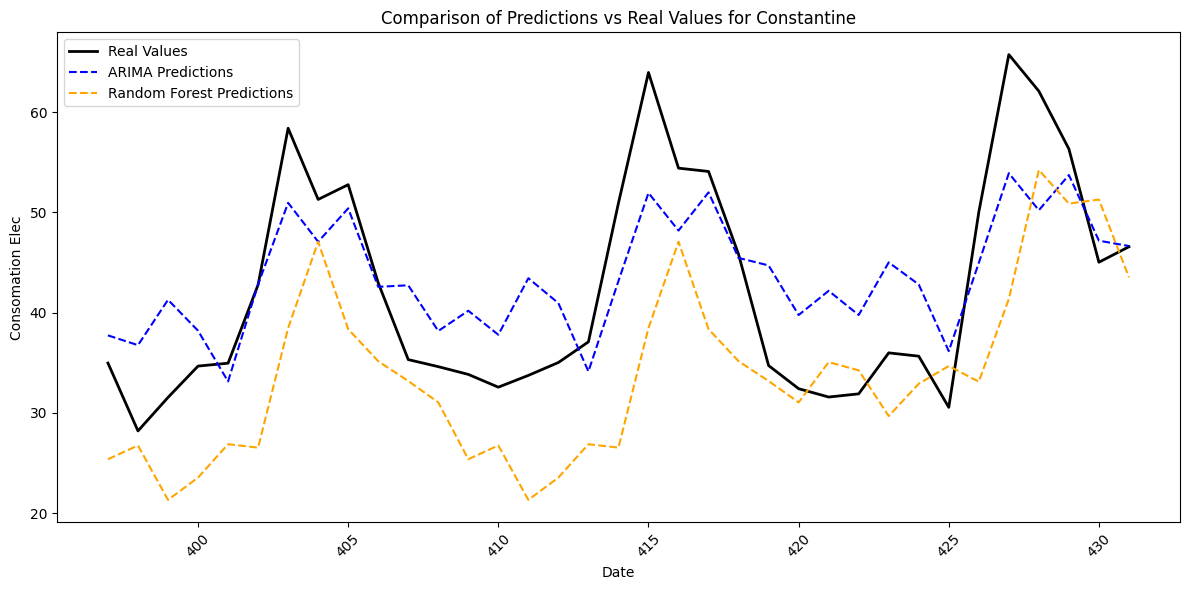

In [59]:
min_length = min(len(dates), len(real_values), len(forecast_arima), len(predictions_rf))
dates = dates[:min_length]
real_values = real_values[:min_length]
forecast_arima = forecast_arima[:min_length]
predictions_rf = predictions_rf[:min_length]
    
    # Create plot
plt.figure(figsize=(12, 6))
plt.plot(dates, real_values, label='Real Values', color='black', linewidth=2)
plt.plot(dates, forecast_arima, label='ARIMA Predictions', color='blue', linestyle='--')
plt.plot(dates, predictions_rf, label='Random Forest Predictions', color='orange', linestyle='--')
    
plt.title(f'Comparison of Predictions vs Real Values for {region}')
plt.xlabel('Date')
plt.ylabel('Consomation Elec')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()